<a href="https://colab.research.google.com/github/aimanhamdani/PKC2024/blob/master/day22_k_mean_clustering_save_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:
df.age.fillna(df.groupby(['sex','pclass'])['age'].transform('mean'),inplace=True)

<ipython-input-4-964f99196031>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.age.fillna(df.groupby(['sex','pclass'])['age'].transform('mean'),inplace=True)


In [ ]:
X=df[['age','fare']]
X.head()

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-0.55136635, -0.50244517],
       [ 0.65402951,  0.78684529],
       [-0.25001739, -0.48885426],
       ...,
       [-0.57020066, -0.17626324],
       [-0.25001739, -0.04438104],
       [ 0.20200606, -0.49237783]])

# To calculate inertia for different number of clusters

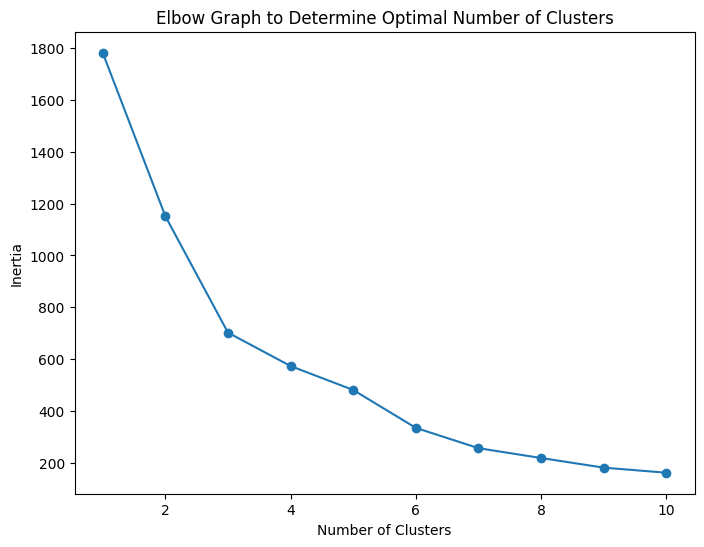

In [ ]:
inertia = []
for n in range(1, 11):
  kmeans = KMeans(n_clusters=n, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Graph to Determine Optimal Number of Clusters')
plt.show()





In [ ]:
# X_scaled_df.head()

In [ ]:
# X_scaled_df=pd.DataFrame(X_scaled,columns=['age1','fare1'])

In [ ]:
model=KMeans(n_clusters=3)

In [ ]:
model.fit(X_scaled)

KMeans(n_clusters=3)

In [ ]:
df['cluster']=model.labels_
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


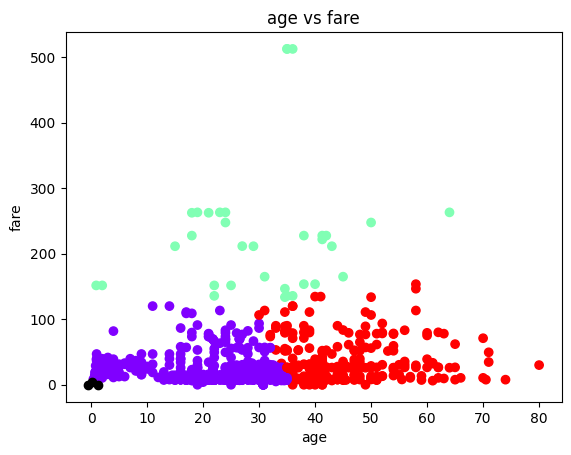

In [ ]:
plt.scatter(df.age,df.fare,c=df.cluster,cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')
plt.title('age vs fare')
plt.xlabel('age')
plt.ylabel('fare')
plt.show()

# If i want to see actual centroid point of k mean clustering instead of z score. then code is following below:

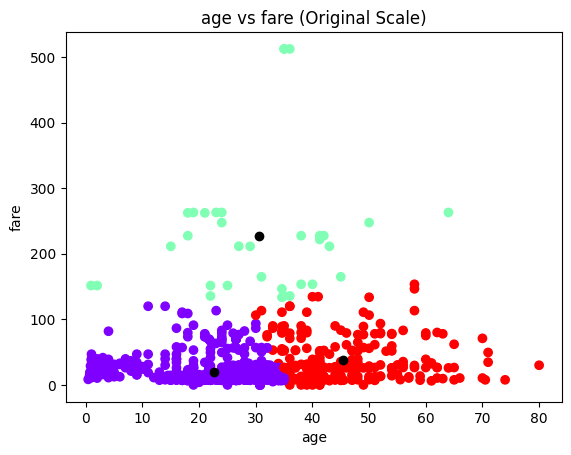

In [ ]:
# Get the centroids from the KMeans model
centroids = model.cluster_centers_

# Reverse standardization
original_centroids = scaler.inverse_transform(centroids)

# Plot the original centroids
plt.scatter(df['age'], df['fare'], c=df['cluster'], cmap='rainbow')
plt.scatter(original_centroids[:, 0], original_centroids[:, 1], color='black')
plt.title('age vs fare (Original Scale)')
plt.xlabel('age')
plt.ylabel('fare')
plt.show()


# Now we use ploty library to make plots

In [ ]:
import plotly.express as px

In [ ]:
fig=px.scatter(df,x='age',y='fare',color='cluster')
fig.show()

In [ ]:
fig=px.scatter_3d(df,x='age',y='fare',z='pclass',color='cluster')
fig.show()

# To make a parallel_coordinates plot

In [ ]:
fig=px.parallel_coordinates(df,color='cluster',title='parallel_coordinates')
fig.show()

In [ ]:
fig = px.parallel_coordinates(df, dimensions=['age', 'fare', 'pclass'], color='cluster', title='Parallel Coordinates')
fig.show()


In [ ]:
fig = px.parallel_coordinates(df, color='cluster', range_color=[0, 4], title='Parallel Coordinates')
fig.show()

# Sunburst

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [ ]:
fig1=px.sunburst(df,path=['who','class','cluster'],values='survived',title='sunburst')
fig1.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
import joblib
joblib.dump(model,'KmeanClusteringTitanic.joblib')


['KmeanClusteringTitanic.joblib']

#TIPS DATASET

In [ ]:
import seaborn as sns
df1=sns.load_dataset('tips')
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
X=df1.drop('sex',axis=1)
y=df1['sex']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labels=LabelEncoder()

In [ ]:
y=labels.fit_transform(y)

In [ ]:
y_pd=pd.DataFrame(y)
y_pd.value_counts()

,count
0,
1,157
0,87


In [ ]:
X.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
X.columns

Index(['total_bill', 'tip', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
X.smoker=labels.fit_transform(X.smoker)
X.day=labels.fit_transform(X.day)
X.time=labels.fit_transform(X.time)

In [ ]:
X.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,2,0,2
1,10.34,1.66,0,2,0,3
2,21.01,3.50,0,2,0,3
3,23.68,3.31,0,2,0,2
4,24.59,3.61,0,2,0,4


In [ ]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(195, 6)
(49, 6)
(195,)
(49,)


In [ ]:
model=DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)
#also we can write in low code
# model=DecisionTreeClassifier().fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_predicted=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,classification_report,roc_auc_score

In [ ]:
accuracy=accuracy_score(y_test,y_predicted)
print('accuracy =',accuracy)
precision=precision_score(y_test,y_predicted)
print('precision =',precision)
recall=recall_score(y_test,y_predicted)
print('recall =',recall)
f1=f1_score(y_test,y_predicted)
print('f1 =',f1)
classification=classification_report(y_test,y_predicted)
print('classification =',classification)
roc_auc=roc_auc_score(y_test,y_predicted)
print('roc_auc =',roc_auc)

accuracy = 0.6530612244897959
precision = 0.7096774193548387
recall = 0.7333333333333333
f1 = 0.7213114754098361
classification =               precision    recall  f1-score   support

           0       0.56      0.53      0.54        19
           1       0.71      0.73      0.72        30

    accuracy                           0.65        49
   macro avg       0.63      0.63      0.63        49
weighted avg       0.65      0.65      0.65        49

roc_auc = 0.6298245614035088
